In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [25]:
df.shape

(32, 12)

In [26]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# A couple of more steps...

# Check for linearity

In [27]:
df.corr().mpg

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

In [28]:
df_select = df.loc[:, ['cyl', 'disp','hp','wt','mpg']]
df_select.head(2)

,cyl,disp,hp,wt,mpg
0,6,160.0,110,2.620,21.0
1,6,160.0,110,2.875,21.0


# Normality

In [29]:
from scipy import stats

In [30]:
print(stats.skew(df_select.cyl))
print(stats.kurtosis(df_select.cyl))

-0.18312865234479678
-1.6809684168130405


In [31]:
print(stats.skew(df_select.disp))
print(stats.kurtosis(df_select.disp))

0.40027244847286664
-1.0896826570135087


In [32]:
print(stats.skew(df_select.hp))
print(stats.kurtosis(df_select.hp))

0.7614356361333623
0.05223272840399584


In [33]:
print(stats.skew(df_select.wt))
print(stats.kurtosis(df_select.wt))

0.44378553550607647
0.1724705401587352


In [34]:
print(stats.skew(df_select.mpg))
print(stats.kurtosis(df_select.mpg))

0.6404398640318834
-0.20053320971549793


In [35]:
df_select.drop('cyl', axis=1, inplace=True)
df_select.head()

,disp,hp,wt,mpg
0,160.0,110,2.620,21.0
1,160.0,110,2.875,21.0
2,108.0,93,2.320,22.8
3,258.0,110,3.215,21.4
4,360.0,175,3.440,18.7


# Multicolineairity

In [36]:
df_select.corr()

,disp,hp,wt,mpg
disp,1.000000,0.790949,0.887980,-0.847551
hp,0.790949,1.000000,0.658748,-0.776168
wt,0.887980,0.658748,1.000000,-0.867659
mpg,-0.847551,-0.776168,-0.867659,1.000000


<AxesSubplot:>

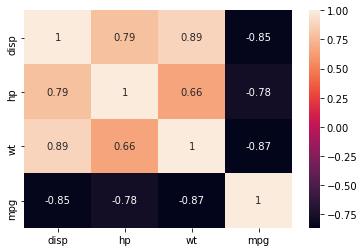

In [38]:
import seaborn as sns
sns.heatmap(df_select.corr(), annot=True)

# Seperate the predictors and target

In [41]:
df_select.head(2)

,disp,hp,wt,mpg
0,160.0,110,2.620,21.0
1,160.0,110,2.875,21.0


In [44]:
X = df_select.iloc[:,:-1]
y = df_select.mpg

# Train Test Split

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [183]:
X_train.head()

,disp,hp,wt
28,351.0,264,3.17
10,167.6,123,3.44
9,167.6,123,3.44
0,160.0,110,2.62
6,360.0,245,3.57


In [184]:
X.shape

(32, 3)

In [185]:
X_train.shape

(25, 3)

In [186]:
X_test.shape

(7, 3)

# Train the model

In [187]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

# Evaluate the model

In [188]:
y_predict = model.predict(X_test)

In [189]:
from sklearn.metrics import r2_score

In [190]:
r2_score(y_test, y_predict)

0.8251782188559098